<h2><font color="#004D7F" size=6> Análisis de datos</font></h2>



<h1><font color="#004D7F" size=5>1. Cargar el conjunto de datos</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Propuesta para exploración inicial de datos</font><br>

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
* [2. Cargar CSV](#section2)
    * [2.1. Desde Pandas](#section2)
* [3. Descripción del conjunto de datos](#section3)
* [4. Distribución entre clases: _groupby('class').size()_](#section4)
* [5.Correlaciones](#section5)
* [6.Asimetría](#section6)
* [7. Visualización Univariable](#section7)
    * [7.1. Histogramas](#section71)
    * [7.3. Boxplot](#section73)
    * [7.4. Valores únicos en cada variable del dataframe](#section74)
* [8.Valores nulos](#section8)
* [9.Dispersión por clase](#section9)
* [10.Informe HTML de la base](#section10)

In [1]:
import os

# Load libraries
import os
%matplotlib inline
from itertools import cycle, islice
from matplotlib import pyplot
from matplotlib.colors import ListedColormap
from pandas import read_csv
from pandas.plotting import scatter_matrix
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import norm
from sklearn import cluster, datasets
from sklearn import datasets, metrics, model_selection, svm
from sklearn import preprocessing
from sklearn.base import BaseEstimator, clone
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC # for Support Vector Classification model
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.validation import check_is_fitted
import matplotlib.pyplot as plt
import missingno as msno
import multiprocessing
import numpy as np # for data manipulation
import pandas as pd # for data manipulation
import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization
import scipy.cluster.hierarchy as sch
import scipy.stats
import seaborn as sns
import time
import warnings
pd.set_option('display.max_columns', 60)
warnings.filterwarnings('ignore')

---

<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>

Este documento tiene como objetivo mostrar una posible implementación para la exploración de datos inicial de la iniciativa

---

<a id="section2"></a>
# <font color="#004D7F"> 2. Carga CSV</font>

Debe poder cargar sus datos antes de comenzar su proyecto de aprendizaje automático. El formato más común para los datos de aprendizaje automático son los archivos CSV. Hay varias formas de cargar un archivo CSV en Python:
* Cargue archivos CSV con la biblioteca estándar de Python.
* Cargue archivos CSV con NumPy.
* Cargue archivos CSV con Pandas.

Sin embargo aca lo cargaremos con Pandas

<a id="section21"></a>
## <font color="#004D7F">2.1. Desde Pandas</font>

Puede cargar sus datos CSV usando Pandas y la función `pandas.read_csv()`. Esta función es muy flexible y es quizás mi enfoque recomendado para cargar sus datos de aprendizaje automático. La función devuelve un pandas. [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) que puede comenzar a resumir y trazar de inmediato. El siguiente ejemplo supone que el archivo `ryanair_reviews.scv` que no está en el directorio de trabajo actual y por eso agrego primero la dirección. Tenga en cuenta que en este ejemplo especificamos explícitamente los nombres de cada atributo al DataFrame...
Hay que tener seguridad del separador del archivo en caso de ser .csv, en este caso es un "|" y header=0 es que esté el encabezado.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

# Asegúrate de usar la ruta correcta a tu archivo
file_path = '/content/drive/MyDrive/M 1000 IA- equipo 1/ryanair_reviews.csv'

df = pd.read_csv(file_path)


El pdf para analizar codigos de aeropuerto

In [4]:
import pandas as pd

# Asegúrate de usar la ruta correcta a tu archivo
file_path = '/content/drive/MyDrive/M 1000 IA- equipo 1/codigosAeropuertos.xlsx'

cod = pd.read_excel(file_path)

In [5]:
cod= pd.DataFrame(cod)

In [6]:
cod


,CIUDAD,COD,PAIS
0,ABADAN,ABD,IRAN
1,ABIDJAN,ABJ,COSTA DE MARFIL
2,ABU DHABI,AUH,EMIRATOS ARABES
3,ACAPULCO,ACA,MEXICO
4,ACCRA,ACC,GHANA
...,...,...,...
506,WINNIPEG,YWG,CANADA
507,XIAMEN,XMN,REPUBLICA POP. CHINA
508,ZAGREB,ZAG,CROACIA
509,ZAPALA,APZ,ARGENTINA


In [7]:
df

,Unnamed: 0,Date Published,Overall Rating,Passenger Country,Trip_verified,Comment title,Comment,Type Of Traveller,Seat Type,Origin,Destination,Date Flown,Ground Service,Value For Money,Recommended,Seat Comfort,Cabin Staff Service,Aircraft,Food & Beverages,Inflight Entertainment,Wifi & Connectivity
0,0,2024-04-29,1.0,Portugal,Trip Verified,"""lack of responsibility""","It was really bad, after finding out that ther...",Family Leisure,Economy Class,Birmingham,Porto,April 2024,1.0,1.0,no,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2024-04-25,1.0,France,Trip Verified,"""a classic rip off""",We booked a Ryanair flight from Paris Beauvais...,Family Leisure,Economy Class,Paris Beauvais,Poznan,April 2024,1.0,1.0,no,1.0,1.0,NaN,NaN,NaN,NaN
2,2,2024-04-22,1.0,France,Trip Verified,“refused to book me onto another flight”,"We all know Ryanair is garbage, but here is an...",Business,Economy Class,Limoges,Manchester,February 2024,3.0,3.0,no,3.0,3.0,NaN,NaN,NaN,NaN
3,3,2024-04-08,1.0,Jordan,Trip Verified,“lost my luggage on a direct flight”,Ryanair lost my luggage on a direct flight. I ...,Business,Economy Class,Charleroi (Brussels South),"Amman, Jordan",April 2024,1.0,1.0,no,2.0,1.0,NaN,NaN,NaN,NaN
4,4,2024-04-08,1.0,Switzerland,Trip Verified,"""incompetent to help passengers""",Booked Basel to Dublin 11.10 6.4.24. Baggage C...,Family Leisure,Economy Class,Basel,Dublin,April 2024,1.0,1.0,no,1.0,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257,2257,2012-08-28,2.0,United Kingdom,NaN,Ryanair customer review,Myself and my daughter took a holiday to Kos. ...,NaN,Economy Class,NaN,NaN,NaN,NaN,1.0,no,1.0,1.0,NaN,1.0,NaN,NaN
2258,2258,2012-08-28,1.0,United Kingdom,NaN,Ryanair customer review,Stansted to Pula. Tried to adhere to all rules...,NaN,Economy Class,NaN,NaN,NaN,NaN,1.0,no,3.0,2.0,NaN,0.0,NaN,NaN
2259,2259,2012-08-28,1.0,United Kingdom,NaN,Ryanair customer review,When printing the boarding tickets we got our ...,NaN,Economy Class,NaN,NaN,NaN,NaN,1.0,no,1.0,1.0,NaN,1.0,NaN,NaN
2260,2260,2012-08-28,1.0,Australia,NaN,Ryanair customer review,Budapest - Manchester and back again with a 5 ...,NaN,Economy Class,NaN,NaN,NaN,NaN,2.0,no,1.0,1.0,NaN,1.0,NaN,NaN


Muchos conjuntos de datos ya vienen ya por defecto en Python a través de la librería [scikit-learn](https://scikit-learn.org/stable/datasets/index.html), lo que significa que no necesita cargar el paquete explícitamente. Estos conjunto de datos se encuentran dentro del módulo `datasets` y de ahí podrán cargarse de manera muy sencillo cargarlo

<a id="section3"></a>
# <font color="#004D7F"> 3. Descripción de conjuntos de datos</font>

In [8]:
df.shape

(2262, 21)

Para visualizar cuales columnas tiene el archivo

In [9]:
df.columns

Index(['Unnamed: 0', 'Date Published', 'Overall Rating', 'Passenger Country',
       'Trip_verified', 'Comment title', 'Comment', 'Type Of Traveller',
       'Seat Type', 'Origin', 'Destination', 'Date Flown', 'Ground Service',
       'Value For Money', 'Recommended', 'Seat Comfort', 'Cabin Staff Service',
       'Aircraft', 'Food & Beverages', 'Inflight Entertainment',
       'Wifi & Connectivity'],
      dtype='object')

Cambios de nombres que se escribe el nombreactual:nombreacambiar

Ahora bien, estos conjuntos de datos nos interesa poder convertirlos a un Dataframe de Pandas para poder trabajar con ellos de manera correcta.

In [10]:
df=pd.DataFrame(df)

Los siguientes comandos nos muestran las 5 primeros filas y las 5 últimas filas.

In [11]:
df.head(5)

,Unnamed: 0,Date Published,Overall Rating,Passenger Country,Trip_verified,Comment title,Comment,Type Of Traveller,Seat Type,Origin,Destination,Date Flown,Ground Service,Value For Money,Recommended,Seat Comfort,Cabin Staff Service,Aircraft,Food & Beverages,Inflight Entertainment,Wifi & Connectivity
0,0,2024-04-29,1.0,Portugal,Trip Verified,"""lack of responsibility""","It was really bad, after finding out that ther...",Family Leisure,Economy Class,Birmingham,Porto,April 2024,1.0,1.0,no,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2024-04-25,1.0,France,Trip Verified,"""a classic rip off""",We booked a Ryanair flight from Paris Beauvais...,Family Leisure,Economy Class,Paris Beauvais,Poznan,April 2024,1.0,1.0,no,1.0,1.0,NaN,NaN,NaN,NaN
2,2,2024-04-22,1.0,France,Trip Verified,“refused to book me onto another flight”,"We all know Ryanair is garbage, but here is an...",Business,Economy Class,Limoges,Manchester,February 2024,3.0,3.0,no,3.0,3.0,NaN,NaN,NaN,NaN
3,3,2024-04-08,1.0,Jordan,Trip Verified,“lost my luggage on a direct flight”,Ryanair lost my luggage on a direct flight. I ...,Business,Economy Class,Charleroi (Brussels South),"Amman, Jordan",April 2024,1.0,1.0,no,2.0,1.0,NaN,NaN,NaN,NaN
4,4,2024-04-08,1.0,Switzerland,Trip Verified,"""incompetent to help passengers""",Booked Basel to Dublin 11.10 6.4.24. Baggage C...,Family Leisure,Economy Class,Basel,Dublin,April 2024,1.0,1.0,no,1.0,1.0,NaN,NaN,NaN,NaN


si por alguna razón nos sirve más ver los últimos 5

In [12]:
df.tail(5)

,Unnamed: 0,Date Published,Overall Rating,Passenger Country,Trip_verified,Comment title,Comment,Type Of Traveller,Seat Type,Origin,Destination,Date Flown,Ground Service,Value For Money,Recommended,Seat Comfort,Cabin Staff Service,Aircraft,Food & Beverages,Inflight Entertainment,Wifi & Connectivity
2257,2257,2012-08-28,2.0,United Kingdom,NaN,Ryanair customer review,Myself and my daughter took a holiday to Kos. ...,NaN,Economy Class,NaN,NaN,NaN,NaN,1.0,no,1.0,1.0,NaN,1.0,NaN,NaN
2258,2258,2012-08-28,1.0,United Kingdom,NaN,Ryanair customer review,Stansted to Pula. Tried to adhere to all rules...,NaN,Economy Class,NaN,NaN,NaN,NaN,1.0,no,3.0,2.0,NaN,0.0,NaN,NaN
2259,2259,2012-08-28,1.0,United Kingdom,NaN,Ryanair customer review,When printing the boarding tickets we got our ...,NaN,Economy Class,NaN,NaN,NaN,NaN,1.0,no,1.0,1.0,NaN,1.0,NaN,NaN
2260,2260,2012-08-28,1.0,Australia,NaN,Ryanair customer review,Budapest - Manchester and back again with a 5 ...,NaN,Economy Class,NaN,NaN,NaN,NaN,2.0,no,1.0,1.0,NaN,1.0,NaN,NaN
2261,2261,2012-08-23,2.0,United Kingdom,NaN,Ryanair customer review,Stansted to Barcelona. Fine going there. Horre...,NaN,Economy Class,NaN,NaN,NaN,NaN,1.0,no,1.0,2.0,NaN,0.0,NaN,NaN


Ahora bien, estos conjuntos de datos nos interesa poder convertirlos a un Dataframe de Pandas para poder trabajar con ellos de manera correcta.

Con el siguiente comando podemos ver los tipos de datos registrados en cada variable, se debe tomar en cuenta para toma de decisiones de transformaciones o cambio de tipo de variable requerido en próximos análisis

Verificación del cambio de tipo de variable

In [13]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.dtypes.head(15))

Unnamed: 0             int64
Date Published        object
Overall Rating       float64
Passenger Country     object
Trip_verified         object
Comment title         object
Comment               object
Type Of Traveller     object
Seat Type             object
Origin                object
Destination           object
Date Flown            object
Ground Service       float64
Value For Money      float64
Recommended           object
dtype: object


Cuando queremos un descriptivo estadístico de las variables numéricas, se puede obtener de la siguiente manera

In [14]:
df.describe()

,Unnamed: 0,Overall Rating,Ground Service,Value For Money,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Wifi & Connectivity
count,2262.000000,2131.000000,1591.000000,2261.000000,2149.000000,2140.000000,1315.000000,334.000000,270.000000
mean,1130.500000,4.373534,2.151477,2.729323,2.370405,2.743925,1.923954,1.155689,1.122222
std,653.127476,3.552865,1.488001,1.692559,1.289760,1.534955,1.490813,0.563942,0.534903
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,565.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1130.500000,3.000000,1.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000
75%,1695.750000,8.000000,3.000000,5.000000,3.000000,4.000000,3.000000,1.000000,1.000000
max,2261.000000,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2262 entries, 0 to 2261
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2262 non-null   int64  
 1   Date Published          2262 non-null   object 
 2   Overall Rating          2131 non-null   float64
 3   Passenger Country       2262 non-null   object 
 4   Trip_verified           1318 non-null   object 
 5   Comment title           2262 non-null   object 
 6   Comment                 2262 non-null   object 
 7   Type Of Traveller       1648 non-null   object 
 8   Seat Type               2262 non-null   object 
 9   Origin                  1647 non-null   object 
 10  Destination             1647 non-null   object 
 11  Date Flown              1644 non-null   object 
 12  Ground Service          1591 non-null   float64
 13  Value For Money         2261 non-null   float64
 14  Recommended             2262 non-null   

<a id="section4"></a>
## <font color="#004D7F">4. Distribución entre clases: _groupby('class').size()_ </font>

Puede ver que hay casi el doble de observaciones con la clase 0 (sin aparición de diabetes) que con la clase 1 (aparición de diabetes). En este caso podemos observar que las clases se encuentran desbalanceadas por lo que los tenemos que analizar muy los resultados de los algoritmos.

In [16]:
df.groupby("Passenger Country").size()

Passenger Country
Albania                    2
Argentina                  1
Australia                 55
Austria                   13
Belarus                    5
                        ... 
Ukraine                   11
United Arab Emirates       3
United Kingdom          1170
United States            167
Vietnam                    1
Length: 73, dtype: int64

In [17]:
df.groupby("Type Of Traveller").count()

,Unnamed: 0,Date Published,Overall Rating,Passenger Country,Trip_verified,Comment title,Comment,Seat Type,Origin,Destination,Date Flown,Ground Service,Value For Money,Recommended,Seat Comfort,Cabin Staff Service,Aircraft,Food & Beverages,Inflight Entertainment,Wifi & Connectivity
Type Of Traveller,,,,,,,,,,,,,,,,,,,,
Business,128,128,128,128,105,128,128,128,128,128,128,125,128,128,122,122,55,55,25,20
Couple Leisure,590,590,590,590,468,590,590,590,590,590,589,567,590,590,544,541,172,258,123,105
Family Leisure,379,379,379,379,290,379,379,379,379,379,379,371,379,379,356,353,109,169,77,64
Solo Leisure,551,551,551,551,455,551,551,551,550,550,548,528,550,551,513,510,218,219,109,81


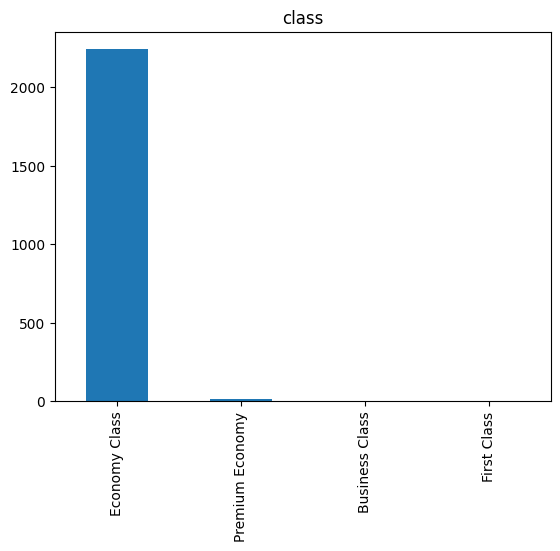

In [18]:
import matplotlib.pyplot as plt
# Gráfico de barras de donaciones por edad
pd.value_counts(df["Seat Type"]).plot(kind='bar', title='class')
plt.show(abs)

In [19]:
df.columns

Index(['Unnamed: 0', 'Date Published', 'Overall Rating', 'Passenger Country',
       'Trip_verified', 'Comment title', 'Comment', 'Type Of Traveller',
       'Seat Type', 'Origin', 'Destination', 'Date Flown', 'Ground Service',
       'Value For Money', 'Recommended', 'Seat Comfort', 'Cabin Staff Service',
       'Aircraft', 'Food & Beverages', 'Inflight Entertainment',
       'Wifi & Connectivity'],
      dtype='object')

In [20]:
pip install dataprep

In [21]:
from dataprep.eda import create_report
import pandas as pd

# Crear y mostrar el reporte con dataprep
report = create_report(df)
report.show_browser()  # Esto abrirá el reporte en el navegador

# Guardar el reporte en un archivo HTML
report.save("reporte_dataprep.html")


Report has been saved to reporte_dataprep.html!


In [22]:
pip install skimpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.1/117.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 46.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.6.0 requires sqlalchemy<3.0dev,>=1.4, but you have sqlalchemy 1.3.24 which is incompatible.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
dataprep 0.4.5 requires pandas<2.0,>=1.1, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires ipykernel==5.5.6, but yo

In [23]:
from skimpy import skim

skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2262   │ │ string      │ 12    │                                                          │
│ │ Number of columns │ 21     │ │ float64     │ 8     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name             ┃ NA    ┃ NA %   ┃ mean   ┃ sd      ┃ p0  ┃ p25    ┃ p50   ┃ p75   ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ Unnamed: 0              │     0 │      0 │   1130 │   653.1 │   0 │  565.2 │  1130 │  1696 │ 2261 │ ▇▇▇▇▇▇ │  │
│ │ Overall Rating          │   131 │   5.79 │  4.374 │   3.553 │   1 │      1 │     3 │     8 │   10 │ ▇▁▁▁▂▃ │  │
│ │ Ground Service          │   671 │  29.66 │  2.151 │   1.488 │   1 │      1 │     1 │     3 │    5 │ ▇▁ ▂▂▂ │  │
│ │ Value For Money         │     1 │   0.04 │  2.729 │   1.693 │   0 │      1 │     2 │     5 │    5 │  ▇▂▂▂▅ │  │
│ │ Seat Comfort            │   113 │      5 │   2.37 │    1.29 │   0 │      1 │     2 │     3 │    5 │  ▇▅▆▃▁ │  │
│ │ Cabin Staff Service     │   122 │   5.39 │  2.744 │   1.535 │   0 │      1 │     3 │     4 │    5 │  ▇▃▅▅▅ │  │
│ │ Food & Beverages        │   947 │  41.87 │  1.924 │   1.491 │   0 │      1 │     1 │     3 │    5 │ ▃▇▃▅▃▁ │  │
│ │ Inflight Entertainment  │  1928 │  85.23 │  1.156 │  0.5639 │   1 │      1 │     1 │     1 │    5 │   ▇▁   │  │
│ │ Wifi & Connectivity     │  1992 │  88.06 │  1.122 │  0.5349 │   1 │      1 │     1 │     1 │    5 │   ▇    │  │
│ └─────────────────────────┴───────┴────────┴────────┴─────────┴─────┴────────┴───────┴───────┴──────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                     ┃ NA        ┃ NA %       ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Date Published                  │         0 │          0 │                        1 │                 2262 │  │
│ │ Passenger Country               │         0 │          0 │                      1.6 │                 3644 │  │
│ │ Trip_verified                   │       944 │      41.73 │                      1.2 │                 2631 │  │
│ │ Comment title                   │         0 │          0 │                      4.3 │                 9702 │  │
│ │ Comment                         │         0 │          0 │                      130 │               293239 │  │
│ │ Type Of Traveller               │       614 │      27.14 │                      1.4 │                 3168 │  │
│ │ Seat Type                       │         0 │          0 │                        2 │                 4524 │  │
│ │ Origin                          │       615 │      2

Diccionario de los aeropuertos y pa[ises a los que pertenecen

In [25]:
# # Crear un diccionario de nombres de aeropuertos y el país al que pertenecen
# airport_country_mapping = {
#     'Porto': 'Portugal',
#     'Poznan': 'Poland',
#     'Manchester': 'United Kingdom',
#     'Amman, Jordan': 'Jordan',
#     'Dublin': 'Ireland',
#     'Cologne': 'Germany',
#     'Milan': 'Italy',
#     'Sevilla': 'Spain',
#     'Faro': 'Portugal',
#     'Stansted': 'United Kingdom',
#     'Sofia': 'Bulgaria',
#     'Brussels': 'Belgium',
#     'London': 'United Kingdom',
#     'Luton': 'United Kingdom',
#     'Alicante': 'Spain',
#     'Paris Beauvais': 'France',
#     'Liverpool': 'United Kingdom',
#     'Gdansk': 'Poland',
#     'Pisa': 'Italy',
#     'Barcelona': 'Spain',
#     'Tirana': 'Albania',
#     'Palma de Mallorca': 'Spain',
#     'Gatwick': 'United Kingdom',
#     'Funchal': 'Portugal',
#     'Naples': 'Italy',
#     'Vilnius': 'Lithuania',
#     'Riga': 'Latvia',
#     'Paphos': 'Cyprus',
#     'Kefalonia': 'Greece',
#     'Corfu': 'Greece',
#     'Copenhagen': 'Denmark',
#     'La Rochelle': 'France',
#     'Vasteras': 'Sweden',
#     'Carcassonne': 'France',
#     'Athens': 'Greece',
#     'Madeira': 'Portugal',
#     'Tanger': 'Morocco',
#     'Bristol, UK': 'United Kingdom',
#     'Lisbon': 'Portugal',
#     'Bratislava': 'Slovakia',
#     'Rome': 'Italy',
#     'Chania': 'Greece',
#     'Budapest': 'Hungary',
#     'Bordeaux': 'France',
#     'Berlin': 'Germany',
#     'Limoges': 'France',
#     'London Gatwick': 'United Kingdom',
#     'Venice': 'Italy',
#     'Newcastle': 'United Kingdom',
#     'Belfast': 'United Kingdom',
#     'Edinburgh': 'United Kingdom',
#     'Bergamo': 'Italy',
#     'Santorini': 'Greece',
#     'Dortmund': 'Germany',
#     'Fuerteventura': 'Spain',
#     'Charleroi': 'Belgium',
#     'Marrakech': 'Morocco',
#     'Newquay': 'United Kingdom',
#     'Murcia': 'Spain',
#     'Warsaw': 'Poland',
#     'Malaga': 'Spain',
#     'Tenerife': 'Spain',
#     'Marseille': 'France',
#     'Banja Luka': 'Bosnia and Herzegovina',
#     'Milan Bergamo': 'Italy',
#     'Catania': 'Italy',
#     'Maastricht': 'Netherlands',
#     'Gran Canaria': 'Spain',
#     'Eindhoven': 'Netherlands',
#     'Wroclaw': 'Poland',
#     'Stockholm': 'Sweden',
#     'Krakow': 'Poland',
#     'Nuremberg': 'Germany',
#     'Tangier': 'Morocco',
#     'Leeds': 'United Kingdom',
#     'Dalaman': 'Turkey',
#     'Seville': 'Spain',
#     'Bergerac': 'France',
#     'Paris': 'France',
#     'Santiago': 'Spain',
#     'Rimini': 'Italy',
#     'Luxembourg': 'Luxembourg',
#     'Stockholm Arlanda': 'Sweden',
#     'Menorca': 'Spain',
#     'Kotor': 'Montenegro',
#     'Wien': 'Austria',
#     'Bucharest': 'Romania',
#     'Malta': 'Malta',
#     'Torp': 'Norway',
#     'Zagreb': 'Croatia',
#     'Birmingham': 'United Kingdom',
#     'Majorca': 'Spain',
#     'Lamezia': 'Italy',
#     'Cork': 'Ireland',
#     'Palermo': 'Italy',
#     'Oslo': 'Norway',
#     'Brussels South': 'Belgium',
#     'Shannon': 'Ireland',
#     'Kerry': 'Ireland',
#     'Prague': 'Czech Republic',
#     'Tel Aviv': 'Israel',
#     'Madrid': 'Spain',
#     'Nantes': 'France',
#     'Toulouse': 'France',
#     'Arrecife': 'Spain',
#     'Valletta': 'Malta',
#     'Rome Ciampino': 'Italy',
#     'Knock': 'Ireland',
#     'Southend': 'United Kingdom',
#     'Dubrosnik': 'Croatia',
#     'Rodez': 'France',
#     'Vienna': 'Austria',
#     'Crete': 'Greece',
#     'Ibiza': 'Spain',
#     'Palma': 'Spain',
#     'Bologna': 'Italy',
#     'Podgorica': 'Montenegro',
#     'Frankfurt': 'Germany',
#     'Amsterdam': 'Netherlands',
#     'Thessaloniki': 'Greece',
#     'Perugia': 'Italy',
#     'Rhodes': 'Greece',
#     'Lourdes': 'France',
#     'Brindisi': 'Italy',
#     'Ponta Delgada': 'Portugal',
#     'Lanzarote': 'Spain',
#     'Zaragoza': 'Spain',
#     'Kaunas': 'Lithuania',
#     'Bremen': 'Germany',
#     'Treviso': 'Italy',
#     'Bari': 'Italy',
#     'Derry': 'United Kingdom',
#     'Sarajevo': 'Bosnia and Herzegovina',
#     'Morocco': 'Morocco',
#     'Valencia': 'Spain',
#     'Tallinn': 'Estonia',
#     'Trieste': 'Italy',
#     'Prestwick': 'United Kingdom',
#     'Milano Bergamo': 'Italy',
#     'Glasgow': 'United Kingdom',
#     'Pescara': 'Italy',
#     'Kiev': 'Ukraine',
#     'Frankfurt Hahn': 'Germany',
#     'Split': 'Croatia',
#     'Cagliari': 'Italy',
#     'Cardiff': 'United Kingdom',
#     'Stockholm Skavsta': 'Sweden',
#     'Bournemouth': 'United Kingdom',
#     'Santander': 'Spain',
#     'Rabat': 'Morocco',
#     'Hamburg': 'Germany',
#     'Brno': 'Czech Republic',
#     'Aarhus': 'Denmark',
#     'East Midlands': 'United Kingdom',
#     'Berlin Schönefeld': 'Germany',
#     'Girona': 'Spain',
#     'Stuttgart': 'Germany',
#     'Venice Treviso': 'Italy',
#     'Rome-Ciampino': 'Italy',
#     'Tampere': 'Finland',
#     'Łódź': 'Poland',
#     'Ovda': 'Israel',
#     'Barcelone': 'Spain',
#     'Turin': 'Italy',
#     'Stansted (London)': 'United Kingdom',
#     'Dusseldorf': 'Germany',
#     'Heraklion': 'Greece',
#     'Comiso': 'Italy',
#     'Rhodos': 'Greece',
#     'Las Palmas': 'Spain',
#     'Tarbes': 'France',
#     'Karlsruhe': 'Germany',
#     'Grenoble': 'France',
#     'Verona': 'Italy',
#     'Zadar': 'Croatia',
#     'Agadir': 'Morocco',
#     'Vigo': 'Spain',
#     'Santiago de Compustelo': 'Spain',
#     'Rzeszow': 'Poland',
#     'Poitiers': 'France',
#     'Timisoara': 'Romania',
#     'Fez': 'Morocco',
#     'Rriga': 'Latvia',
#     'FMM': 'Germany',
#     'HHN': 'Germany',
#     'Warsaw Modlin': 'Poland',
#     'Leeds Bradford': 'United Kingdom',
#     'Kos': 'Greece',
#     'Billund': 'Denmark',
#     'Mallorca': 'Spain',
#     'Haugesund': 'Norway',
#     'Knock, Ireland': 'Ireland',
#     'Gasglow': 'United Kingdom',
#     'Bydgoszcz': 'Poland'
#     # Add more mappings as necessary
# }

# # Convert the mapping to a pandas DataFrame for easy handling
# df_airport_country = pd.DataFrame(list(airport_country_mapping.items()), columns=['Airport', 'Country'])

# import ace_tools as tools; tools.display_dataframe_to_user(name="Airport Country Mapping", dataframe=df_airport_country)

# # Display the mapping DataFrame
# df_airport_country.head()


In [ ]:
df['Destination'].unique()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# Contar frecuencias de destino
destination_counts = df['Destination'].value_counts()

# Filtrar para obtener los 20 destinos más populares
top_destinations = destination_counts.head(20).index.tolist()

# Filtrar el DataFrame original para incluir solo filas con los 20 destinos más populares
filtered_df = df[df['Destination'].isin(top_destinations)]

# Crear un gráfico dirigido
G = nx.from_pandas_edgelist(filtered_df, 'Origin', 'Destination', create_using=nx.DiGraph())

# Configurar la visualización
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.15, iterations=20)  # Puedes jugar con la configuración para mejorar la disposición
nx.draw_networkx(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='k', linewidths=1, font_size=15, arrows=True)

# Mostrar el gráfico
plt.title("Top 20 Destinations and their Origins")
plt.show()



<a id="section5"></a>
## <font color="#004D7F"> 5. Correlaciones: _corr()_ </font>

Puede usar la función corr() para calcular una matriz de correlación. La matriz enumera todos los atributos en la parte superior y lateral, para dar correlación entre todos los pares de atributos (dos veces, porque la matriz es simétrica). Puede ver que la línea diagonal a través de la matriz desde las esquinas superior izquierda a inferior derecha de la matriz muestra una correlación perfecta de cada atributo consigo mismo.

In [ ]:
import numpy as np
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return(corr_mat)

corr_matrix = df.select_dtypes(include=['float64', 'int',"uint8","int32"]).corr(method='spearman')
tidy=tidy_corr_matrix(corr_matrix)

In [ ]:
tidy.head(25)

Si se quiere extraer el cuadro de correlaciones porque es muy grande, se puede exportar a excel para ver con mayor claridad

In [ ]:
#tidy.to_excel("corr.xlsx")

Con la siguiente matriz de correlación se puede ver un mapa de calor según el nivel de correlación, que obtuvimos en la estimación anterior

In [ ]:
import seaborn as sns
#Matriz de correlación de variables continuas.
top_corr_features=corr_matrix.index
plt.figure(figsize=(10,5))
fig=sns.heatmap(df[top_corr_features].corr(),annot=True,
                cmap="Accent")

In [ ]:

# continuos= df.select_dtypes(include=['float64', 'int',"uint8","int32"])
# continuos.columns

Opciones para analizar las relaciones entre pares,
Gráficos de dispersión y de distribución respecto a alguna categoría

In [ ]:
#sns.pairplot(continuos, palette = 'coolwarm')#

<a id="section6"></a>
## <font color="#004D7F">6. Asimetría: _skew()_ </font>

Puede calcular el sesgo de cada atributo utilizando la función `skew()`. El resultado de inclinación muestra una inclinación positiva (derecha) o negativa (izquierda). Los valores más cercanos a cero muestran menos sesgo.

In [ ]:
#df.skew()

* Si una distribución parece casi
gaussiana pero se empuja hacia
la izquierda o hacia la derecha,
es útil conocer el sesgo.
* Valores cercanos a cero tienen
un menor sesgo, sin embargo,
sesgo a la izquierda será con
valores negativos y sesgo a la
derecha serán valores positivos.

Visualización de la asimetría

In [ ]:

# import seaborn as sns
# #histogram and normal probability plot
# sns.distplot(df['sepal_length'], fit=norm);
# fig = plt.figure()
# res = stats.probplot(df['sepal_length'], plot=plt)

<a id="section7"></a>
# <font color="#004D7F"> 7. Visualización Univariable</font>

Las gráficas univariable nos permiten visualizar los atributos individuales sin interacciones; las cuales, el objetivo principal de las mismas es aprender algo sobre la distribución, la tendencia y la propagación de cada atributo.

A continuación se describen las más relevantes.

<a id="section71"></a>
## <font color="#004D7F">7.1. Histogramas </font>

A partir de la forma de los contenedores, puede tener una idea rápida de si un atributo es gaussiano, sesgado o incluso tiene una distribución exponencial. También puede ayudarlo a ver posibles valores atípicos, por lo que [Matplotlib](https://www.datacamp.com/community/tutorials/histograms-matplotlib) es una pontente librería de visualización de datos

In [ ]:
# #Histograma aplicado en cada una de las variables.
# continuos.hist(bins=33, figsize=(15, 15))

<a id="section73"></a>
## <font color="#004D7F">7.3. Boxplot </font>

In [ ]:
# %matplotlib inline
# # Univariate Boxplot
# df.plot(kind="box")

<a id="section74"></a>
## <font color="#004D7F">7.4. Valores únicos en cada variable del dataframe (categóricos) </font>

si quiero un análisis de cuales variables son categóricas

In [ ]:
# categoricos=df.select_dtypes(include='object')

In [ ]:
# categoricos.agg(['count', 'nunique']).transpose()

Cuales categorías por columna

In [ ]:
# for col in categoricos.columns:
#   print ("* %s= tiene los valores únicos siguientes: %s." %(col, df[col].unique()))

<a id="section8"></a>
# <font color="#004D7F"> 8. Valores nulos</font>

<a id="section81"></a>
## <font color="#004D7F"> 8.1 Valores nulos individuales</font>

Cuando se quiere analizar los valores nulos de una variable específica

In [ ]:
# #cantidad de valores nulos de la columna del indice
# df["sepal_length"].isnull().sum().sum()

<a id="section81"></a>
## <font color="#004D7F"> 8.2 Valores individuales en toda la tabla</font>

A continuación se presentan varias opciones, según cual se adecue mejor a las necesidades.
La siguiente es una función para obtener la cantidad de faltantes por variable en una lista

In [ ]:
#Funcion para datos faltantes
import numpy as np
def cantidad_faltantes(df):
    for col in df.columns.tolist():
        print('{} - valores faltantes: {}'.format(col, df[col].isnull().sum()))
    print('\n')

In [ ]:
cantidad_faltantes(df)

In [ ]:
null_df = pd.DataFrame({'null_counts':df.isna().sum().sort_values(ascending=False), 'null_pct':df.isna().sum()/df.shape[0] * 100}).T.astype(int).T
null_df

Este comando puede servir para obtener información detallada, el número de columna, el nombre, la cantidad de no-nulos y el tipo de variable de cada columna

In [ ]:
# df.info(verbose=True, null_counts=True)

Datos faltantes en orden descendente

In [ ]:
df.isna().sum().sort_values(ascending=False)

Si quiero estimar cuantos faltan y eso cuanto representa

In [ ]:
#missing data
#hice el cambio para obtener el nombre de la  base
df_train=df
total = df_train.isnull().sum().sort_values(ascending=True)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=True)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.tail(73)

Con este comando se puede visualizar los faltantes en la base, todos los amarillos son los faltantes, gráficamente

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

alternativa

In [ ]:
import missingno as msno
msno.matrix(df, figsize=(8,3))

<a id="section81"></a>
## <font color="#004D7F"> 8.3 correlación entre valores faltantes</font>

En este caso los que no tienen datos es porque no tienen suficientes datos faltantes para hacer el análisis. Es importante por que a partir de este se puede notar razones de porqué son faltantes

In [ ]:
msno.heatmap(df, figsize=(10,5))

<a id="section9"></a>
# <font color="#004D7F"> 9. Matriz de Dispersión por clase</font>

Los puntos en una matriz de diagrama de dispersión pueden ser coloreados por la etiqueta de clase en problemas de clasificación. Esto puede ayudarnos a detectar una separación clara (o no clara) de las clases y quizás a darnos una idea de lo difícil que puede ser el problema.

Al igual que el anterior gráfico los diagramas están dados por la interacción de los pares de atributos pero, en este caso, teniendo en cuenta la etiqueta clase.

In [ ]:
# %matplotlib inline
# sns.pairplot(df, hue="class")

In [ ]:
# %matplotlib inline

# #Correlation boxplot for clases

# plt.figure(1)
# plt.subplots(figsize=(10,10))
# plt.subplot(421)
# sns.boxplot(x="class", y="sepal_length", data=df)
# plt.title("sepal_length")
# plt.grid(True)

# plt.figure(2)
# plt.subplots(figsize=(10,10))
# plt.subplot(421)
# sns.boxplot(x="class", y="Sepal_width", data=df)
# plt.title("Sepal_width")
# plt.grid(True)


In [ ]:
# #Relación entre ...
# sns.catplot(x='sepal_length', y='Sepal_width', hue='class', kind = 'box', data = df)

<a id="section10"></a>
# <font color="#004D7F"> 10. Informe HTML de los datos</font>

Con el siguiente comando hacemos un reporte .html sobre cada una de las variables de la base, histograma y análisis individual

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz as sv
#analyzing the dataset
df_analysis=sv.analyze(df)
#show analysis as html
df_analysis.show_html('train_analysis.html')